<a href="https://colab.research.google.com/github/JoseOrtega51/Duffing_Oscillator_Chaos/blob/main/DuffingPoincar%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Authors:

*   Carlos Aguilar Abad
*   Francisco Osácar Puyoles
*   Paul Rosa Ruiz
*   José Ortega Moya

In [ ]:

import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
#cond. iniciales
x0=2;
v0=0;
x02=2.0001;
v02=0;

In [ ]:
def f(t,x,v):
  a=1; #coeficiente x
  b=1; #coef x^3
  c=0.2; #amortiguamiento
  F=0.3; #amplitud fuerza
  m=1; #masa
  w=1; #frecuencia fuerza
  return [v,(a*x-b*x**3-c*v+F*math.cos(w*t))/m]

In [ ]:
def RK(x,v,t,h):
  #Runge-kutta orden 4 en dos variables
  Vf=f(t,x,v);
  k1=h*Vf[0];
  l1=h*Vf[1];
  Vf=f(t+h/2,x+k1/2,v+l1/2);
  k2=h*Vf[0];
  l2=h*Vf[1];
  Vf=f(t+h/2,x+k2/2,v+l2/2);
  k3=h*Vf[0];
  l3=h*Vf[1];
  Vf=f(t+h,x+k3,v+l3);
  k4=h*Vf[0];
  l4=h*Vf[1];
  return[x+1/6*(k1+2*k2+2*k3+k4),v+1/6*(l1+2*l2+2*l3+l4)]

In [ ]:
#Comparación entres dos soluciones con condiciones iniciales muy parecidas.
t=np.linspace(0,300,30000) #particion tiempo
h=t[1]-t[0] #Escalon de tiempo
x=np.zeros(np.size(t))
v=np.zeros(np.size(t))
x2=np.zeros(np.size(t))
v2=np.zeros(np.size(t))
x[0]=x0;
v[0]=v0;
x2[0]=x02;
v2[0]=v02;
for i in range(np.size(t)-1):
  #Bucle para resolver
  RKsol=RK(x[i],v[i],t[i],h)
  x[i+1]=RKsol[0];
  v[i+1]=RKsol[1];
for i in range(np.size(t)-1):
  #Bucle para resolver
  RKsol=RK(x2[i],v2[i],t[i],h)
  x2[i+1]=RKsol[0];
  v2[i+1]=RKsol[1];

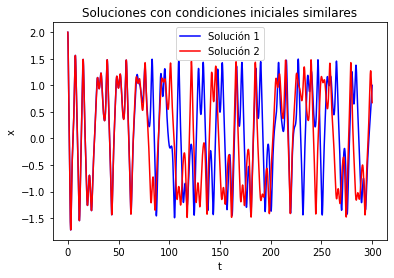

In [ ]:
plt.plot(t, x, '-b', label='Solución 1')
plt.plot(t, x2, '-r', label='Solución 2')
plt.xlabel("t")
plt.ylabel("x")
plt.title("Soluciones con condiciones iniciales similares")
plt.legend()
plt.savefig("posicion2caos.png",dpi=200)

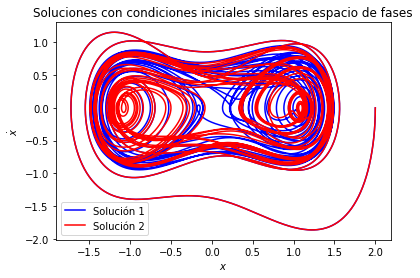

In [ ]:
plt.plot(x, v, '-b', label='Solución 1')
plt.plot(x2, v2, '-r', label='Solución 2')
plt.ylabel("$\dot{x}$")
plt.xlabel("$x$")
plt.title("Soluciones con condiciones iniciales similares espacio de fases")
plt.legend()
plt.savefig("fases2caos.png",dpi=200)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in sqrt
  """Entry point for launching an IPython kernel.


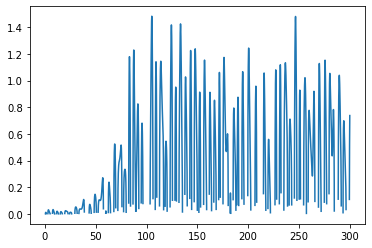

In [ ]:
d=np.sqrt(x*x-x2*x2) #distancia entre soluciones
plt.plot(t,d)

In [ ]:
#Sección de poincaré tomando "foto" cada 2*pi unidades de tiempo
Dt=2*math.pi/1000
Px=np.zeros(10001)
Pv=np.zeros(10001)
x=x0;
v=v0;

for i in range(10000000):
  t=i*Dt
  RKsol=RK(x,v,t,Dt)
  x=RKsol[0];
  v=RKsol[1];
  if(i%1000==0):
    N=round(i/1000);
    Px[N]=x
    Pv[N]=v



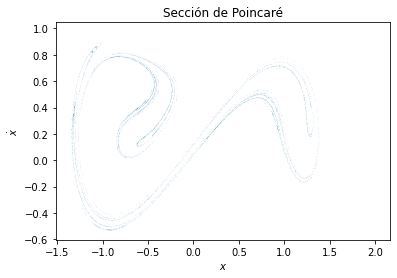

In [ ]:
plt.plot(Px,Pv,'.',markersize=0.3,fillstyle="full",markeredgewidth=0.0)
plt.xlabel("$x$")
plt.ylabel("$\dot{x}$")
plt.title("Sección de Poincaré")
plt.savefig("poincare.png",dpi=1200)
#El marcador está muy pequeño para que al exportar la imagen se medio vea el fractal

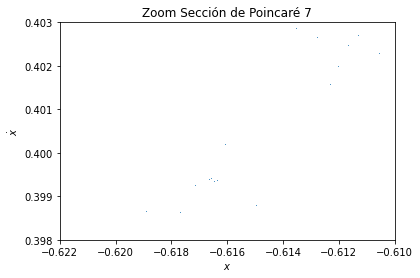

In [ ]:
plt.plot(Px,Pv,'.',markersize=2,fillstyle="full",markeredgewidth=0.0)
plt.xlabel("$x$")
plt.ylabel("$\dot{x}$")
plt.title("Zoom Sección de Poincaré 7")
plt.xlim([-0.622,-0.61])
plt.ylim([0.398,0.403])
plt.savefig("zoomPoincare7.png",dpi=1200)

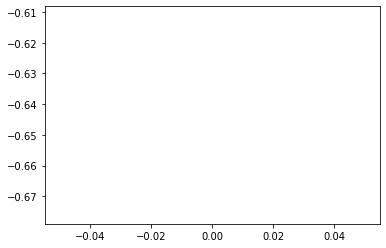

In [ ]:
plt.plot(x)